In [1]:
# basic dependencies

import numpy as np
from numpy import loadtxt
from numpy import savetxt

import pandas as pd
import math
import time

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

###########

import torch

tkwargs = {"dtype": torch.double, # set as double to minimize zero error for cholesky decomposition error
           "device": torch.device("cuda:0" if torch.cuda.is_available() else "cpu")} # set tensors to GPU, if multiple GPUs please set cuda:x properly

torch.set_printoptions(precision=3)

###########

# plotting dependencies
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# this is for the colorbar, you can change the cmap if you prefer other colour schemes
from matplotlib.cm import ScalarMappable
cm = plt.cm.get_cmap('viridis')

# function to return the std dev across runs
def ci(y, N_TRIALS):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
from pymoo.factory import get_problem
from botorch.utils.multi_objective.hypervolume import Hypervolume

ref_point = torch.tensor([11,11], **tkwargs)
hv=Hypervolume(ref_point=-ref_point) # sets the hv based on problem, flip since BoTorch takes maximisation

problem = get_problem("zdt1")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT1 has a max HV of {volume}")

problem = get_problem("zdt2")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT2 has a max HV of {volume}")

problem = get_problem("zdt3")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [11, 11], ZDT3 has a max HV of {volume}")

ref_point = torch.tensor([1.2,1.2], **tkwargs)
hv=Hypervolume(ref_point=-ref_point) # sets the hv based on problem, flip since BoTorch takes maximisation
problem = get_problem("mw7")
volume = hv.compute(torch.tensor(-problem.pareto_front(), **tkwargs))
print(f"Using pymoo's Pareto set with reference point of [1.2, 1.2], MW7 has a max HV of {volume}")

Using pymoo's Pareto set with reference point of [11, 11], ZDT1 has a max HV of 120.66140936892067
Using pymoo's Pareto set with reference point of [11, 11], ZDT2 has a max HV of 120.32829983335034
Using pymoo's Pareto set with reference point of [11, 11], ZDT3 has a max HV of 128.77549696900383
Using pymoo's Pareto set with reference point of [1.2, 1.2], MW7 has a max HV of 0.5039622081235824


In [4]:
problem = "ZDT1"
max_hv = 120.66140936892067

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_96by2.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_48by4.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_24by8.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_12by16.csv", delimiter=',')

hv_nsga3_plot_ZDT1_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_ZDT1_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_ZDT1_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_ZDT1_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_96by2.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_48by4.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_24by8.csv", delimiter=',')

hv_qnehvi_plot_ZDT1_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_ZDT1_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_ZDT1_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 

In [5]:
problem = "ZDT2"
max_hv = 120.32829983335034

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_96by2.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_48by4.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_24by8.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_12by16.csv", delimiter=',')

hv_nsga3_plot_ZDT2_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_ZDT2_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_ZDT2_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_ZDT2_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_96by2.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_48by4.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_24by8.csv", delimiter=',')

hv_qnehvi_plot_ZDT2_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_ZDT2_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_ZDT2_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 

In [6]:
problem = "ZDT3"
max_hv = 128.77549696900383

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_96by2.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_48by4.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_24by8.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_12by16.csv", delimiter=',')

hv_nsga3_plot_ZDT3_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_ZDT3_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_ZDT3_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_ZDT3_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_96by2.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_48by4.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_24by8.csv", delimiter=',')

hv_qnehvi_plot_ZDT3_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_ZDT3_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_ZDT3_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 

In [7]:
problem = "MW7"
max_hv = 0.5039622081235824

hvs_nsga3_all0 = loadtxt(f"{problem}_hvs_nsga3_96by2.csv", delimiter=',')
hvs_nsga3_all1 = loadtxt(f"{problem}_hvs_nsga3_48by4.csv", delimiter=',')
hvs_nsga3_all2 = loadtxt(f"{problem}_hvs_nsga3_24by8.csv", delimiter=',')
hvs_nsga3_all3 = loadtxt(f"{problem}_hvs_nsga3_12by16.csv", delimiter=',')

hv_nsga3_plot_MW7_0 = np.log10(max_hv - np.asarray(hvs_nsga3_all0)) 
hv_nsga3_plot_MW7_1 = np.log10(max_hv - np.asarray(hvs_nsga3_all1)) 
hv_nsga3_plot_MW7_2 = np.log10(max_hv - np.asarray(hvs_nsga3_all2)) 
hv_nsga3_plot_MW7_3 = np.log10(max_hv - np.asarray(hvs_nsga3_all3)) 

####

hvs_qnehvi_all0 = loadtxt(f"{problem}_hvs_qnehvi_96by2.csv", delimiter=',')
hvs_qnehvi_all1 = loadtxt(f"{problem}_hvs_qnehvi_48by4.csv", delimiter=',')
hvs_qnehvi_all2 = loadtxt(f"{problem}_hvs_qnehvi_24by8.csv", delimiter=',')

hv_qnehvi_plot_MW7_0 = np.log10(max_hv - np.asarray(hvs_qnehvi_all0)) 
hv_qnehvi_plot_MW7_1 = np.log10(max_hv - np.asarray(hvs_qnehvi_all1)) 
hv_qnehvi_plot_MW7_2 = np.log10(max_hv - np.asarray(hvs_qnehvi_all2)) 

In [8]:
max_hv = 0.661678290035639

hvs_nsga3_all0 = loadtxt(f"3Dprinting_hvs_nsga3_96by2.csv", delimiter=',')
hv_nsga3_plot_3d_0 = np.log10(max_hv-hvs_nsga3_all0)

hvs_nsga3_all1 = loadtxt(f"3Dprinting_hvs_nsga3_48by4.csv", delimiter=',')
hv_nsga3_plot_3d_1 = np.log10(max_hv-hvs_nsga3_all1)

hvs_nsga3_all2 = loadtxt(f"3Dprinting_hvs_nsga3_24by8.csv", delimiter=',')
hv_nsga3_plot_3d_2 = np.log10(max_hv-hvs_nsga3_all2)

hvs_nsga3_all3 = loadtxt(f"3Dprinting_hvs_nsga3_12by16.csv", delimiter=',')
hv_nsga3_plot_3d_3 = np.log10(max_hv-hvs_nsga3_all3)

hvs_qnehvi_all0 = loadtxt(f"3Dprinting_hvs_qnehvi_96by2.csv", delimiter=',')
hv_qnehvi_plot_3d_0 = np.log10(max_hv-hvs_qnehvi_all0)

hvs_qnehvi_all1 = loadtxt(f"3Dprinting_hvs_qnehvi_48by4.csv", delimiter=',')
hv_qnehvi_plot_3d_1 = np.log10(max_hv-hvs_qnehvi_all1)

hvs_qnehvi_all2 = loadtxt(f"3Dprinting_hvs_qnehvi_24by8.csv", delimiter=',')
hv_qnehvi_plot_3d_2 = np.log10(max_hv-hvs_qnehvi_all2)

In [9]:
max_hv = 1.3651840855899149

hvs_nsga3_all0 = loadtxt(f"concrete_hvs_nsga3_96by2.csv", delimiter=',')
hv_nsga3_plot_concrete_0 = np.log10(max_hv-hvs_nsga3_all0)

hvs_nsga3_all1 = loadtxt(f"concrete_hvs_nsga3_48by4.csv", delimiter=',')
hv_nsga3_plot_concrete_1 = np.log10(max_hv-hvs_nsga3_all1)

hvs_nsga3_all2 = loadtxt(f"concrete_hvs_nsga3_24by8.csv", delimiter=',')
hv_nsga3_plot_concrete_2 = np.log10(max_hv-hvs_nsga3_all2)

hvs_nsga3_all3 = loadtxt(f"concrete_hvs_nsga3_12by16.csv", delimiter=',')
hv_nsga3_plot_concrete_3 = np.log10(max_hv-hvs_nsga3_all3)

hvs_qnehvi_all0 = loadtxt(f"concrete_hvs_qnehvi_96by2.csv", delimiter=',')
hv_qnehvi_plot_concrete_0 = np.log10(max_hv-hvs_qnehvi_all0)

hvs_qnehvi_all1 = loadtxt(f"concrete_hvs_qnehvi_48by4.csv", delimiter=',')
hv_qnehvi_plot_concrete_1 = np.log10(max_hv-hvs_qnehvi_all1)

hvs_qnehvi_all2 = loadtxt(f"concrete_hvs_qnehvi_24by8.csv", delimiter=',')
hv_qnehvi_plot_concrete_2 = np.log10(max_hv-hvs_qnehvi_all2)

In [10]:
max_hv = 1.2048935476544

hvs_nsga3_all0 = loadtxt(f"thinfilm_hvs_nsga3_96by2.csv", delimiter=',')
hv_nsga3_plot_thinfilm_0 = np.log10(max_hv-hvs_nsga3_all0)

hvs_nsga3_all1 = loadtxt(f"thinfilm_hvs_nsga3_48by4.csv", delimiter=',')
hv_nsga3_plot_thinfilm_1 = np.log10(max_hv-hvs_nsga3_all1)

hvs_nsga3_all2 = loadtxt(f"thinfilm_hvs_nsga3_24by8.csv", delimiter=',')
hv_nsga3_plot_thinfilm_2 = np.log10(max_hv-hvs_nsga3_all2)

hvs_nsga3_all3 = loadtxt(f"thinfilm_hvs_nsga3_12by16.csv", delimiter=',')
hv_nsga3_plot_thinfilm_3 = np.log10(max_hv-hvs_nsga3_all3)

hvs_qnehvi_all0 = loadtxt(f"thinfilm_hvs_qnehvi_96by2.csv", delimiter=',')
hv_qnehvi_plot_thinfilm_0 = np.log10(max_hv-hvs_qnehvi_all0)

hvs_qnehvi_all1 = loadtxt(f"thinfilm_hvs_qnehvi_48by4.csv", delimiter=',')
hv_qnehvi_plot_thinfilm_1 = np.log10(max_hv-hvs_qnehvi_all1)

hvs_qnehvi_all2 = loadtxt(f"thinfilm_hvs_qnehvi_24by8.csv", delimiter=',')
hv_qnehvi_plot_thinfilm_2 = np.log10(max_hv-hvs_qnehvi_all2)

In [11]:
nsga3_dict = {}
nsga3_dict["ZDT1"] = [hv_nsga3_plot_ZDT1_0,hv_nsga3_plot_ZDT1_1,hv_nsga3_plot_ZDT1_2,hv_nsga3_plot_ZDT1_3]
nsga3_dict["ZDT2"] = [hv_nsga3_plot_ZDT2_0,hv_nsga3_plot_ZDT2_1,hv_nsga3_plot_ZDT2_2,hv_nsga3_plot_ZDT2_3]
nsga3_dict["ZDT3"] = [hv_nsga3_plot_ZDT3_0,hv_nsga3_plot_ZDT3_1,hv_nsga3_plot_ZDT3_2,hv_nsga3_plot_ZDT3_3]
nsga3_dict["MW7"] = [hv_nsga3_plot_MW7_0,hv_nsga3_plot_MW7_1,hv_nsga3_plot_MW7_2,hv_nsga3_plot_MW7_3]
nsga3_dict["3D Printing"] = [hv_nsga3_plot_3d_0,hv_nsga3_plot_3d_1,hv_nsga3_plot_3d_2,hv_nsga3_plot_3d_3]
nsga3_dict["Concrete Slump"] = [hv_nsga3_plot_concrete_0,hv_nsga3_plot_concrete_1,hv_nsga3_plot_concrete_2,hv_nsga3_plot_concrete_3]
nsga3_dict["Thin Film"] = [hv_nsga3_plot_thinfilm_0,hv_nsga3_plot_thinfilm_1,hv_nsga3_plot_thinfilm_2,hv_nsga3_plot_thinfilm_3]


qnehvi_dict = {}
qnehvi_dict["ZDT1"] = [hv_qnehvi_plot_ZDT1_0, hv_qnehvi_plot_ZDT1_1, hv_qnehvi_plot_ZDT1_2]
qnehvi_dict["ZDT2"] = [hv_qnehvi_plot_ZDT2_0, hv_qnehvi_plot_ZDT2_1, hv_qnehvi_plot_ZDT2_2]
qnehvi_dict["ZDT3"] = [hv_qnehvi_plot_ZDT3_0, hv_qnehvi_plot_ZDT3_1, hv_qnehvi_plot_ZDT3_2]
qnehvi_dict["MW7"] = [hv_qnehvi_plot_MW7_0, hv_qnehvi_plot_MW7_1, hv_qnehvi_plot_MW7_2]
qnehvi_dict["3D Printing"] = [hv_qnehvi_plot_3d_0, hv_qnehvi_plot_3d_1, hv_qnehvi_plot_3d_2]
qnehvi_dict["Concrete Slump"] = [hv_qnehvi_plot_concrete_0, hv_qnehvi_plot_concrete_1, hv_qnehvi_plot_concrete_2]
qnehvi_dict["Thin Film"] = [hv_qnehvi_plot_thinfilm_0, hv_qnehvi_plot_thinfilm_1, hv_qnehvi_plot_thinfilm_2]

[Text(0, 0.5, 'Log Hypervolume Difference')]

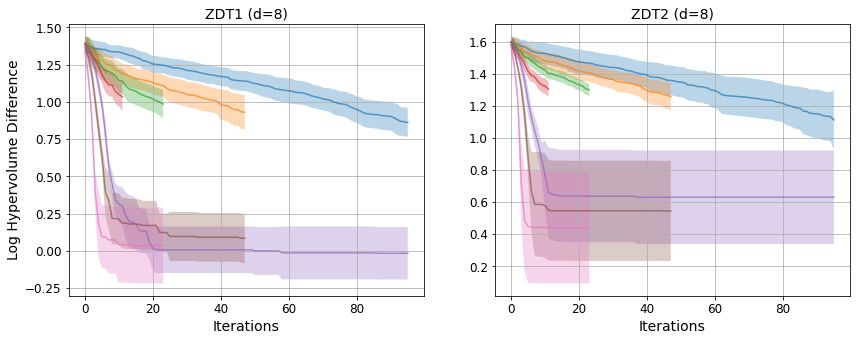

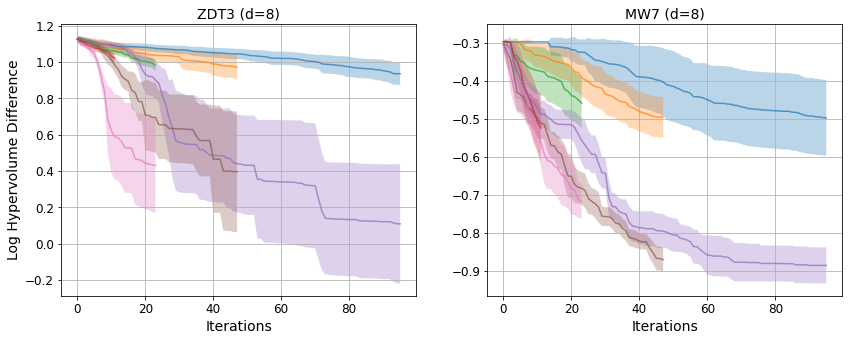

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, problem in enumerate(["ZDT1", "ZDT2"]):
    
    hvlist = nsga3_dict[problem]
    iterlist = [96, 48, 24, 12]
    batchlist = [2, 4, 8, 16]
    
    for hv, iteration, batch in zip(hvlist, iterlist, batchlist):    

        ax[i].plot(np.arange(iteration),
                hv.mean(axis=0),
                label=f'U-NSGA-III ({iteration} x {batch})', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(iteration),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3)

    hvlist = qnehvi_dict[problem]
    iterlist = [96, 48, 24]
    batchlist = [2, 4, 8] 

    for hv, iteration, batch in zip(hvlist, iterlist, batchlist):    

        ax[i].plot(np.arange(iteration),
                hv.mean(axis=0),
                label=f'qNEHVI ({iteration} x {batch})', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(iteration),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"{problem} (d=8)", fontsize=14)
     
ax[0].set(ylabel='Log Hypervolume Difference')
#fig.savefig('batching1.pdf')

#ax[0].legend(loc='best')

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, problem in enumerate(["ZDT3", "MW7"]):
    
    hvlist = nsga3_dict[problem]
    iterlist = [96, 48, 24, 12]
    batchlist = [2, 4, 8, 16]
    
    for hv, iteration, batch in zip(hvlist, iterlist, batchlist):    

        ax[i].plot(np.arange(iteration),
                hv.mean(axis=0),
                label=f'U-NSGA-III ({iteration} x {batch})', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(iteration),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3)

    hvlist = qnehvi_dict[problem]
    iterlist = [96, 48, 24]
    batchlist = [2, 4, 8] 

    for hv, iteration, batch in zip(hvlist, iterlist, batchlist):    

        ax[i].plot(np.arange(iteration),
                hv.mean(axis=0),
                label=f'qNEHVI ({iteration} x {batch})', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(iteration),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"{problem} (d=8)", fontsize=14)

ax[0].set(ylabel='Log Hypervolume Difference')

#fig.savefig('batching2.pdf')

#fig.legend(bbox_to_anchor=(-0.1,-0.5), loc="lower center", ncol=2, fontsize=12)
#plt.savefig('batching_legend.pdf')

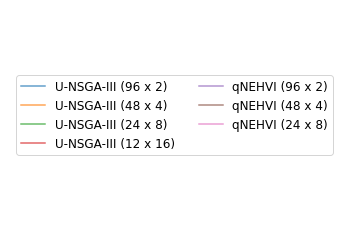

In [73]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.axis('off')
legend = ax2.legend(*ax[0].get_legend_handles_labels(), loc='center', ncol=2, fontsize=12)
fig  = legend.figure
fig.canvas.draw()

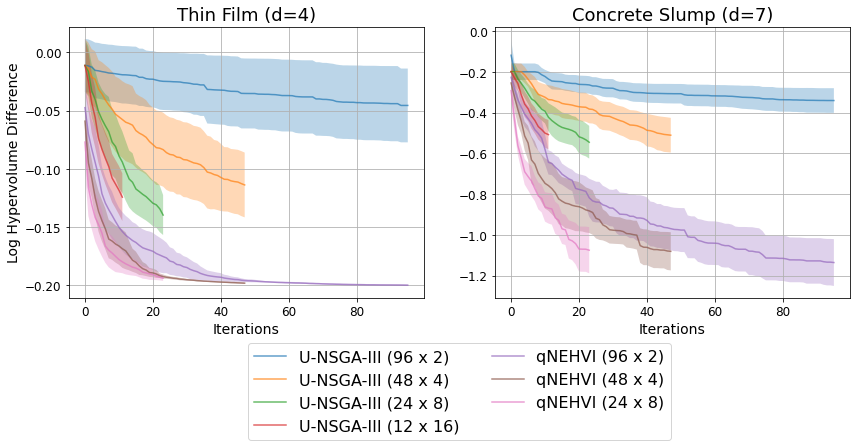

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, problem, dim in zip([0,1], ["Thin Film", "Concrete Slump"], [4,7]):
    
    hvlist = nsga3_dict[problem]
    iterlist = [96, 48, 24, 12]
    batchlist = [2, 4, 8, 16]
    
    for hv, iteration, batch in zip(hvlist, iterlist, batchlist):    

        ax[i].plot(np.arange(iteration),
                hv.mean(axis=0),
                label=f'U-NSGA-III ({iteration} x {batch})', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(iteration),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3)

    hvlist = qnehvi_dict[problem]
    iterlist = [96, 48, 24]
    batchlist = [2, 4, 8] 

    for hv, iteration, batch in zip(hvlist, iterlist, batchlist):    

        ax[i].plot(np.arange(iteration),
                hv.mean(axis=0),
                label=f'qNEHVI ({iteration} x {batch})', linewidth=1.5, alpha=0.7)

        ax[i].fill_between(np.arange(iteration),
                        hv.mean(axis=0)-ci(hv, 10), hv.mean(axis=0)+ci(hv, 10),
                        alpha=0.3)
        
    ax[i].set(xlabel='Iterations')
    ax[i].grid(True)
    ax[i].set_title(f"{problem} (d={dim})", fontsize=18)

ax[0].set(ylabel='Log Hypervolume Difference')
fig.savefig('batching3.pdf')

plt.legend(bbox_to_anchor=(-0.1,-0.55), loc="lower center", ncol=2, fontsize=16)